#### Name: Alamin Musa Magaga
#### Email: alaminmusamagaga@gmail.com
#### Title: Week 5 Solution

In [55]:
# Check for GPU
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [56]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.1.2


'cpu'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

<b>Increase Model Complexity:</b>Underfitting often occurs when a model is too simple to capture the underlying patterns in the data. By increasing the complexity of the model, such as adding more layers to a neural network or increasing the degree of a polynomial regression, you provide the model with more capacity to learn intricate relationships within the data.

<b>Feature Engineering:</b>Inadequate representation of the input features can lead to underfitting. Conducting thorough feature engineering, which involves selecting, transforming, or creating new features, can enhance the model's ability to capture relevant information from the data, improving its overall performance.

<b>Regularization:</b>Regularization methods, such as L1 or L2 regularization in linear models or dropout in neural networks, can help prevent underfitting by penalizing overly complex models. Adjusting the regularization strength allows you to control the trade-off between fitting the training data and maintaining a simpler model that generalizes well to new, unseen data.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [57]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/pizza dataset")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else: 
  print(f"Did not find {image_path} directory, creating...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data (images from GitHub)
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Unzipping pizza, steak, suhsi data to {image_path}")
  zip_ref.extractall(image_path) 

data\pizza dataset\pizza_steak_sushi directory exists.


Unzipping pizza, steak, suhsi data to data\pizza dataset\pizza_steak_sushi


In [58]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [59]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza dataset\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza dataset\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza dataset\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza dataset\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza dataset\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza dataset\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza dataset\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza dataset\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza dataset\pizza_steak_sushi\train\sushi'.


In [60]:
# Setup train and testing paths
train = image_path / "train"
test = image_path / "test"
train, test

(WindowsPath('data/pizza dataset/pizza_steak_sushi/train'),
 WindowsPath('data/pizza dataset/pizza_steak_sushi/test'))

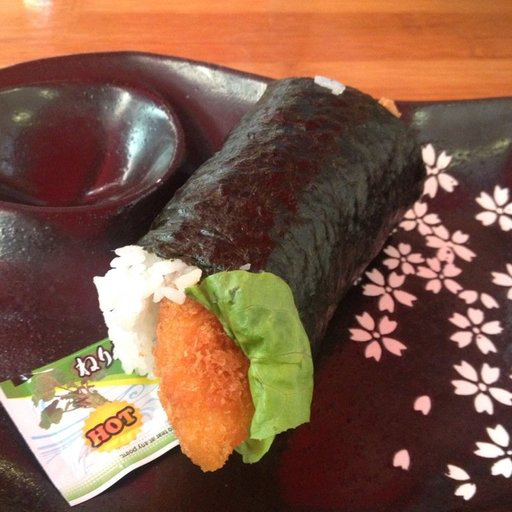

In [61]:
# Visualize an image
from PIL import Image
from IPython.display import display
import random

# Get a list of all image files in the train directory
train_images = list(train.glob("*/*.jpg"))

# Choose a random image file
random_image_path = random.choice(train_images)

# Open the image using PIL
img = Image.open(random_image_path)

# Display the image in the notebook
img


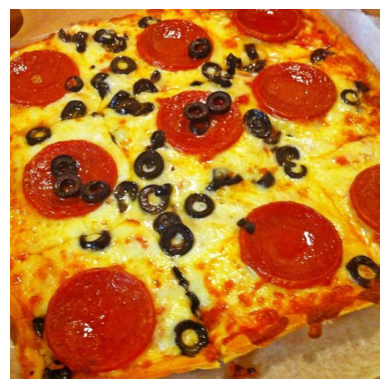

In [62]:
# Do the image visualization with matplotlib
# 3. Visualize an image from the train directory using Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Get a list of all image files in the train directory
train_images = list(train.glob("*/*.jpg"))

# Choose a random image file
random_image_path = random.choice(train_images)

# Display the image using Matplotlib
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()



We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [63]:
# 3.1 Transforming data with torchvision.transforms
from torchvision import transforms

# Define the transform for turning images into tensors
image_to_tensor_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])


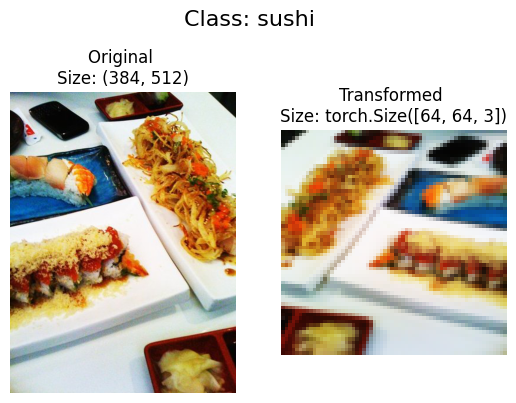

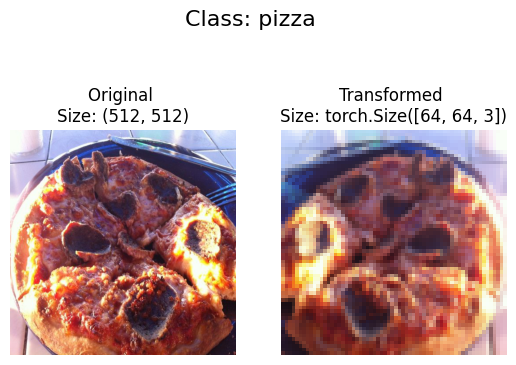

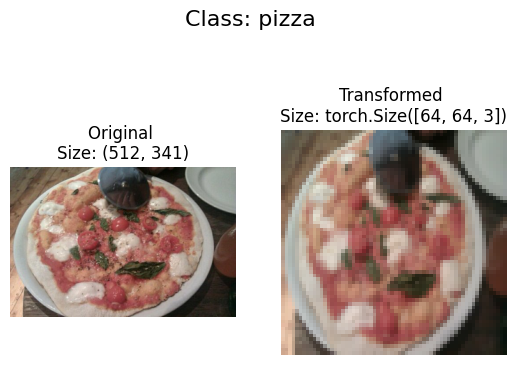

In [64]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(train_images,
                        transform=image_to_tensor_transform,
                        n=3)


### Load image data using `ImageFolder`

In [65]:
# Use ImageFolder to create dataset(s)
from torchvision.datasets import ImageFolder

# Use ImageFolder to create dataset(s)
train_dataset = ImageFolder(root=train, transform=image_to_tensor_transform, target_transform=None)
test_dataset = ImageFolder(root=test, transform=image_to_tensor_transform, target_transform=None)

train_dataset,test_dataset



(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza dataset\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza dataset\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [66]:
# Get class names as a list
class_names = train_dataset.classes
class_names

['pizza', 'steak', 'sushi']

In [67]:
# Can also get class names as a dict
class_dict = train_dataset.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [68]:
# Check the lengths of each dataset
len(train_dataset), len(test_dataset)

(225, 75)

In [69]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1abcc94fe50>,
 <torch.utils.data.dataloader.DataLoader at 0x1abcc94f0d0>)

In [70]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(225, 75)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [71]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) #
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 16 * 16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):

        return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, #RGB
                  hidden_units=10,
                  output_shape=len(train_dataset.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

## 4. Create training and testing functions for `model_0`.

In [72]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X = X.to(device)  
    y = y.to(device)
    # 1. Forward pass
    y_pred = model(X)
    # print(y_pred)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss /= len(dataloader)
  train_acc  /= len(dataloader)
  return train_loss, train_acc 
     

 
  

In [73]:

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X = X.to(device)
      y = y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)
      # print(test_pred_logits)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    
  # Adjust metrics to get average loss and accuracy per batch
  test_loss /=len(dataloader)
  test_acc /=len(dataloader)
  return test_loss, test_acc

In [74]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [75]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=5)

 20%|██        | 1/5 [00:10<00:41, 10.44s/it]

Epoch: 1 | train_loss: 1.1177 | train_acc: 0.2933 | test_loss: 1.0975 | test_acc: 0.4133


 40%|████      | 2/5 [00:22<00:34, 11.38s/it]

Epoch: 2 | train_loss: 1.1082 | train_acc: 0.3422 | test_loss: 1.0996 | test_acc: 0.2533


 60%|██████    | 3/5 [00:34<00:23, 11.90s/it]

Epoch: 3 | train_loss: 1.0994 | train_acc: 0.2889 | test_loss: 1.0999 | test_acc: 0.2933


 80%|████████  | 4/5 [00:48<00:12, 12.48s/it]

Epoch: 4 | train_loss: 1.0981 | train_acc: 0.3600 | test_loss: 1.1026 | test_acc: 0.3467


100%|██████████| 5/5 [01:02<00:00, 12.42s/it]

Epoch: 5 | train_loss: 1.1028 | train_acc: 0.3422 | test_loss: 1.1034 | test_acc: 0.2933


In [77]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20)

  5%|▌         | 1/20 [00:11<03:34, 11.27s/it]

Epoch: 1 | train_loss: 1.1177 | train_acc: 0.2933 | test_loss: 1.0975 | test_acc: 0.4133


 10%|█         | 2/20 [00:23<03:33, 11.89s/it]

Epoch: 2 | train_loss: 1.1082 | train_acc: 0.3422 | test_loss: 1.0996 | test_acc: 0.2533


 15%|█▌        | 3/20 [00:37<03:38, 12.84s/it]

Epoch: 3 | train_loss: 1.0994 | train_acc: 0.2889 | test_loss: 1.0999 | test_acc: 0.2933


 20%|██        | 4/20 [00:51<03:33, 13.33s/it]

Epoch: 4 | train_loss: 1.0981 | train_acc: 0.3600 | test_loss: 1.1026 | test_acc: 0.3467


 25%|██▌       | 5/20 [01:06<03:26, 13.76s/it]

Epoch: 5 | train_loss: 1.1028 | train_acc: 0.3422 | test_loss: 1.1034 | test_acc: 0.2933


 30%|███       | 6/20 [01:19<03:08, 13.47s/it]

Epoch: 6 | train_loss: 1.0952 | train_acc: 0.4178 | test_loss: 1.0982 | test_acc: 0.3867


 35%|███▌      | 7/20 [01:32<02:56, 13.54s/it]

Epoch: 7 | train_loss: 1.0636 | train_acc: 0.4578 | test_loss: 1.0947 | test_acc: 0.4000


 40%|████      | 8/20 [01:46<02:43, 13.65s/it]

Epoch: 8 | train_loss: 0.9953 | train_acc: 0.5378 | test_loss: 1.0945 | test_acc: 0.3867


 45%|████▌     | 9/20 [02:00<02:31, 13.81s/it]

Epoch: 9 | train_loss: 0.9290 | train_acc: 0.5822 | test_loss: 1.1595 | test_acc: 0.4000


 50%|█████     | 10/20 [02:15<02:20, 14.01s/it]

Epoch: 10 | train_loss: 0.8703 | train_acc: 0.6222 | test_loss: 1.0103 | test_acc: 0.4000


 55%|█████▌    | 11/20 [02:30<02:08, 14.33s/it]

Epoch: 11 | train_loss: 0.8351 | train_acc: 0.6222 | test_loss: 1.0098 | test_acc: 0.4533


 60%|██████    | 12/20 [02:44<01:54, 14.36s/it]

Epoch: 12 | train_loss: 0.7798 | train_acc: 0.6533 | test_loss: 1.0425 | test_acc: 0.4533


 65%|██████▌   | 13/20 [02:59<01:41, 14.45s/it]

Epoch: 13 | train_loss: 0.7866 | train_acc: 0.6356 | test_loss: 1.1442 | test_acc: 0.5067


 70%|███████   | 14/20 [03:13<01:26, 14.45s/it]

Epoch: 14 | train_loss: 0.7250 | train_acc: 0.6978 | test_loss: 1.4062 | test_acc: 0.5733


 75%|███████▌  | 15/20 [03:29<01:13, 14.78s/it]

Epoch: 15 | train_loss: 0.7210 | train_acc: 0.6844 | test_loss: 1.0802 | test_acc: 0.4400


 80%|████████  | 16/20 [03:44<00:59, 14.90s/it]

Epoch: 16 | train_loss: 0.6353 | train_acc: 0.7511 | test_loss: 1.4263 | test_acc: 0.4667


 85%|████████▌ | 17/20 [03:59<00:44, 14.91s/it]

Epoch: 17 | train_loss: 0.5925 | train_acc: 0.8000 | test_loss: 1.4006 | test_acc: 0.4933


 90%|█████████ | 18/20 [04:15<00:30, 15.27s/it]

Epoch: 18 | train_loss: 0.5937 | train_acc: 0.7644 | test_loss: 1.3755 | test_acc: 0.4400


 95%|█████████▌| 19/20 [04:30<00:15, 15.24s/it]

Epoch: 19 | train_loss: 0.4915 | train_acc: 0.8000 | test_loss: 1.7029 | test_acc: 0.4933


100%|██████████| 20/20 [04:46<00:00, 14.30s/it]

Epoch: 20 | train_loss: 0.4261 | train_acc: 0.8578 | test_loss: 1.8413 | test_acc: 0.4800


In [78]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=50)

  2%|▏         | 1/50 [00:14<11:39, 14.27s/it]

Epoch: 1 | train_loss: 1.1177 | train_acc: 0.2933 | test_loss: 1.0975 | test_acc: 0.4133


  4%|▍         | 2/50 [00:28<11:32, 14.43s/it]

Epoch: 2 | train_loss: 1.1082 | train_acc: 0.3422 | test_loss: 1.0996 | test_acc: 0.2533


  6%|▌         | 3/50 [00:44<11:39, 14.88s/it]

Epoch: 3 | train_loss: 1.0994 | train_acc: 0.2889 | test_loss: 1.0999 | test_acc: 0.2933


  8%|▊         | 4/50 [00:58<11:11, 14.60s/it]

Epoch: 4 | train_loss: 1.0981 | train_acc: 0.3600 | test_loss: 1.1026 | test_acc: 0.3467


 10%|█         | 5/50 [01:13<11:11, 14.92s/it]

Epoch: 5 | train_loss: 1.1028 | train_acc: 0.3422 | test_loss: 1.1034 | test_acc: 0.2933


 12%|█▏        | 6/50 [01:29<11:06, 15.14s/it]

Epoch: 6 | train_loss: 1.0952 | train_acc: 0.4178 | test_loss: 1.0982 | test_acc: 0.3867


 14%|█▍        | 7/50 [01:44<10:55, 15.25s/it]

Epoch: 7 | train_loss: 1.0636 | train_acc: 0.4578 | test_loss: 1.0947 | test_acc: 0.4000


 16%|█▌        | 8/50 [02:00<10:50, 15.49s/it]

Epoch: 8 | train_loss: 0.9953 | train_acc: 0.5378 | test_loss: 1.0945 | test_acc: 0.3867


 18%|█▊        | 9/50 [02:16<10:31, 15.41s/it]

Epoch: 9 | train_loss: 0.9290 | train_acc: 0.5822 | test_loss: 1.1595 | test_acc: 0.4000


 20%|██        | 10/50 [02:30<10:00, 15.00s/it]

Epoch: 10 | train_loss: 0.8703 | train_acc: 0.6222 | test_loss: 1.0103 | test_acc: 0.4000


 22%|██▏       | 11/50 [02:44<09:39, 14.85s/it]

Epoch: 11 | train_loss: 0.8351 | train_acc: 0.6222 | test_loss: 1.0098 | test_acc: 0.4533


 24%|██▍       | 12/50 [02:59<09:27, 14.93s/it]

Epoch: 12 | train_loss: 0.7798 | train_acc: 0.6533 | test_loss: 1.0425 | test_acc: 0.4533


 26%|██▌       | 13/50 [03:15<09:17, 15.06s/it]

Epoch: 13 | train_loss: 0.7866 | train_acc: 0.6356 | test_loss: 1.1442 | test_acc: 0.5067


 28%|██▊       | 14/50 [03:31<09:15, 15.44s/it]

Epoch: 14 | train_loss: 0.7250 | train_acc: 0.6978 | test_loss: 1.4062 | test_acc: 0.5733


 30%|███       | 15/50 [03:46<08:55, 15.30s/it]

Epoch: 15 | train_loss: 0.7210 | train_acc: 0.6844 | test_loss: 1.0802 | test_acc: 0.4400


 32%|███▏      | 16/50 [04:01<08:35, 15.16s/it]

Epoch: 16 | train_loss: 0.6353 | train_acc: 0.7511 | test_loss: 1.4263 | test_acc: 0.4667


 34%|███▍      | 17/50 [04:17<08:29, 15.44s/it]

Epoch: 17 | train_loss: 0.5925 | train_acc: 0.8000 | test_loss: 1.4006 | test_acc: 0.4933


 36%|███▌      | 18/50 [04:33<08:15, 15.48s/it]

Epoch: 18 | train_loss: 0.5937 | train_acc: 0.7644 | test_loss: 1.3755 | test_acc: 0.4400


 38%|███▊      | 19/50 [04:47<07:53, 15.26s/it]

Epoch: 19 | train_loss: 0.4915 | train_acc: 0.8000 | test_loss: 1.7029 | test_acc: 0.4933


 40%|████      | 20/50 [05:01<07:21, 14.73s/it]

Epoch: 20 | train_loss: 0.4261 | train_acc: 0.8578 | test_loss: 1.8413 | test_acc: 0.4800


 42%|████▏     | 21/50 [05:14<06:57, 14.41s/it]

Epoch: 21 | train_loss: 0.4012 | train_acc: 0.8489 | test_loss: 1.8596 | test_acc: 0.4533


 44%|████▍     | 22/50 [05:28<06:35, 14.12s/it]

Epoch: 22 | train_loss: 0.3699 | train_acc: 0.8533 | test_loss: 1.8473 | test_acc: 0.5733


 46%|████▌     | 23/50 [05:42<06:19, 14.04s/it]

Epoch: 23 | train_loss: 0.3176 | train_acc: 0.8800 | test_loss: 2.3652 | test_acc: 0.4800


 48%|████▊     | 24/50 [05:55<05:59, 13.84s/it]

Epoch: 24 | train_loss: 0.3195 | train_acc: 0.8844 | test_loss: 2.2462 | test_acc: 0.4533


 50%|█████     | 25/50 [06:09<05:46, 13.85s/it]

Epoch: 25 | train_loss: 0.2357 | train_acc: 0.9067 | test_loss: 2.5211 | test_acc: 0.5067


 52%|█████▏    | 26/50 [06:23<05:30, 13.78s/it]

Epoch: 26 | train_loss: 0.2344 | train_acc: 0.9244 | test_loss: 2.6247 | test_acc: 0.4800


 54%|█████▍    | 27/50 [06:36<05:15, 13.71s/it]

Epoch: 27 | train_loss: 0.1772 | train_acc: 0.9289 | test_loss: 2.6409 | test_acc: 0.5067


 56%|█████▌    | 28/50 [06:50<04:59, 13.62s/it]

Epoch: 28 | train_loss: 0.2069 | train_acc: 0.9333 | test_loss: 3.0061 | test_acc: 0.5200


 58%|█████▊    | 29/50 [07:03<04:46, 13.64s/it]

Epoch: 29 | train_loss: 0.1698 | train_acc: 0.9511 | test_loss: 3.2711 | test_acc: 0.5067


 60%|██████    | 30/50 [07:17<04:32, 13.63s/it]

Epoch: 30 | train_loss: 0.1323 | train_acc: 0.9511 | test_loss: 3.6055 | test_acc: 0.4533


 62%|██████▏   | 31/50 [07:30<04:19, 13.63s/it]

Epoch: 31 | train_loss: 0.0981 | train_acc: 0.9644 | test_loss: 3.9252 | test_acc: 0.4933


 64%|██████▍   | 32/50 [07:44<04:04, 13.58s/it]

Epoch: 32 | train_loss: 0.0814 | train_acc: 0.9733 | test_loss: 3.9572 | test_acc: 0.4533


 66%|██████▌   | 33/50 [07:57<03:50, 13.54s/it]

Epoch: 33 | train_loss: 0.0930 | train_acc: 0.9733 | test_loss: 3.9318 | test_acc: 0.5333


 68%|██████▊   | 34/50 [08:11<03:36, 13.50s/it]

Epoch: 34 | train_loss: 0.1169 | train_acc: 0.9556 | test_loss: 4.2918 | test_acc: 0.4933


 70%|███████   | 35/50 [08:24<03:22, 13.52s/it]

Epoch: 35 | train_loss: 0.0952 | train_acc: 0.9778 | test_loss: 4.5339 | test_acc: 0.4800


 72%|███████▏  | 36/50 [08:38<03:09, 13.56s/it]

Epoch: 36 | train_loss: 0.0527 | train_acc: 0.9911 | test_loss: 4.0600 | test_acc: 0.4533


 74%|███████▍  | 37/50 [08:52<02:56, 13.55s/it]

Epoch: 37 | train_loss: 0.0614 | train_acc: 0.9733 | test_loss: 5.2453 | test_acc: 0.4533


 76%|███████▌  | 38/50 [09:05<02:43, 13.61s/it]

Epoch: 38 | train_loss: 0.0309 | train_acc: 0.9956 | test_loss: 5.3159 | test_acc: 0.4667


 78%|███████▊  | 39/50 [09:19<02:29, 13.60s/it]

Epoch: 39 | train_loss: 0.0618 | train_acc: 0.9733 | test_loss: 5.9729 | test_acc: 0.5200


 80%|████████  | 40/50 [09:33<02:16, 13.62s/it]

Epoch: 40 | train_loss: 0.1256 | train_acc: 0.9556 | test_loss: 4.7291 | test_acc: 0.4933


 82%|████████▏ | 41/50 [09:47<02:04, 13.85s/it]

Epoch: 41 | train_loss: 0.0623 | train_acc: 0.9822 | test_loss: 6.0495 | test_acc: 0.4267


 84%|████████▍ | 42/50 [10:00<01:49, 13.68s/it]

Epoch: 42 | train_loss: 0.0467 | train_acc: 0.9867 | test_loss: 4.6234 | test_acc: 0.4800


 86%|████████▌ | 43/50 [10:14<01:35, 13.66s/it]

Epoch: 43 | train_loss: 0.2023 | train_acc: 0.9378 | test_loss: 4.3407 | test_acc: 0.4133


 88%|████████▊ | 44/50 [10:29<01:24, 14.12s/it]

Epoch: 44 | train_loss: 0.0856 | train_acc: 0.9689 | test_loss: 5.4301 | test_acc: 0.4133


 90%|█████████ | 45/50 [10:43<01:10, 14.20s/it]

Epoch: 45 | train_loss: 0.0295 | train_acc: 0.9956 | test_loss: 5.0459 | test_acc: 0.4933


 92%|█████████▏| 46/50 [10:57<00:55, 13.99s/it]

Epoch: 46 | train_loss: 0.0255 | train_acc: 0.9956 | test_loss: 5.5990 | test_acc: 0.5067


 94%|█████████▍| 47/50 [11:11<00:41, 13.89s/it]

Epoch: 47 | train_loss: 0.1329 | train_acc: 0.9600 | test_loss: 4.2925 | test_acc: 0.4400


 96%|█████████▌| 48/50 [11:25<00:28, 14.17s/it]

Epoch: 48 | train_loss: 0.0476 | train_acc: 0.9778 | test_loss: 5.6745 | test_acc: 0.4533


 98%|█████████▊| 49/50 [11:39<00:14, 14.10s/it]

Epoch: 49 | train_loss: 0.0475 | train_acc: 0.9867 | test_loss: 5.1804 | test_acc: 0.5200


100%|██████████| 50/50 [11:53<00:00, 14.27s/it]

Epoch: 50 | train_loss: 0.0738 | train_acc: 0.9822 | test_loss: 5.6824 | test_acc: 0.4000


It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [80]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

model_3_results = train(model=model_3,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  5%|▌         | 1/20 [00:11<03:41, 11.68s/it]

Epoch: 1 | train_loss: 1.0941 | train_acc: 0.4222 | test_loss: 1.0389 | test_acc: 0.4667


 10%|█         | 2/20 [00:24<03:38, 12.14s/it]

Epoch: 2 | train_loss: 0.9903 | train_acc: 0.5422 | test_loss: 1.0024 | test_acc: 0.4533


 15%|█▌        | 3/20 [00:36<03:29, 12.33s/it]

Epoch: 3 | train_loss: 0.9367 | train_acc: 0.5733 | test_loss: 0.9712 | test_acc: 0.4933


 20%|██        | 4/20 [00:49<03:17, 12.35s/it]

Epoch: 4 | train_loss: 0.8799 | train_acc: 0.6000 | test_loss: 1.0088 | test_acc: 0.4533


 25%|██▌       | 5/20 [01:02<03:10, 12.67s/it]

Epoch: 5 | train_loss: 0.8864 | train_acc: 0.5911 | test_loss: 1.1197 | test_acc: 0.4133


 30%|███       | 6/20 [01:15<03:00, 12.89s/it]

Epoch: 6 | train_loss: 0.8560 | train_acc: 0.6133 | test_loss: 0.9556 | test_acc: 0.4933


 35%|███▌      | 7/20 [01:28<02:46, 12.83s/it]

Epoch: 7 | train_loss: 0.8028 | train_acc: 0.6667 | test_loss: 1.0453 | test_acc: 0.5333


 40%|████      | 8/20 [01:41<02:33, 12.82s/it]

Epoch: 8 | train_loss: 0.7503 | train_acc: 0.6933 | test_loss: 0.9941 | test_acc: 0.4933


 45%|████▌     | 9/20 [01:54<02:23, 13.06s/it]

Epoch: 9 | train_loss: 0.7142 | train_acc: 0.7067 | test_loss: 0.9781 | test_acc: 0.4533


 50%|█████     | 10/20 [02:08<02:11, 13.17s/it]

Epoch: 10 | train_loss: 0.6285 | train_acc: 0.7467 | test_loss: 1.0923 | test_acc: 0.5333


 55%|█████▌    | 11/20 [02:24<02:07, 14.12s/it]

Epoch: 11 | train_loss: 0.6077 | train_acc: 0.7600 | test_loss: 1.0033 | test_acc: 0.5733


 60%|██████    | 12/20 [02:38<01:52, 14.10s/it]

Epoch: 12 | train_loss: 0.5636 | train_acc: 0.7778 | test_loss: 1.2544 | test_acc: 0.4400


 65%|██████▌   | 13/20 [02:51<01:37, 13.89s/it]

Epoch: 13 | train_loss: 0.4847 | train_acc: 0.7911 | test_loss: 1.3709 | test_acc: 0.5733


 70%|███████   | 14/20 [03:09<01:29, 14.92s/it]

Epoch: 14 | train_loss: 0.5105 | train_acc: 0.8044 | test_loss: 1.3712 | test_acc: 0.5600


 75%|███████▌  | 15/20 [03:24<01:15, 15.15s/it]

Epoch: 15 | train_loss: 0.4462 | train_acc: 0.8267 | test_loss: 1.4708 | test_acc: 0.4533


 80%|████████  | 16/20 [03:39<01:00, 15.14s/it]

Epoch: 16 | train_loss: 0.3315 | train_acc: 0.8844 | test_loss: 1.8957 | test_acc: 0.5333


 85%|████████▌ | 17/20 [03:55<00:45, 15.24s/it]

Epoch: 17 | train_loss: 0.4028 | train_acc: 0.8089 | test_loss: 1.4312 | test_acc: 0.5200


 90%|█████████ | 18/20 [04:10<00:30, 15.14s/it]

Epoch: 18 | train_loss: 0.2984 | train_acc: 0.9111 | test_loss: 1.7088 | test_acc: 0.5200


 95%|█████████▌| 19/20 [04:24<00:14, 14.90s/it]

Epoch: 19 | train_loss: 0.2747 | train_acc: 0.8978 | test_loss: 2.0742 | test_acc: 0.5067


100%|██████████| 20/20 [04:39<00:00, 13.99s/it]

Epoch: 20 | train_loss: 0.1841 | train_acc: 0.9333 | test_loss: 2.4292 | test_acc: 0.4800


It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [82]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/pizza dataset")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

data\pizza dataset\pizza_steak_sushi_20_percent directory exists.
Unzipping pizza, steak, sushi 20% data...


In [83]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza dataset\pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data\pizza dataset\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in 'data\pizza dataset\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in 'data\pizza dataset\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in 'data\pizza dataset\pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in 'data\pizza dataset\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in 'data\pizza dataset\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in 'data\pizza dataset\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in 'data\pizza dataset\pizza_steak_sushi_20_percent\train\sushi'.


Excellent, we now have double the training and testing images... 

In [84]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(WindowsPath('data/pizza dataset/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza dataset/pizza_steak_sushi_20_percent/test'))

In [87]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64),antialias=True),
  transforms.ToTensor()
])

train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform)

test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(train_data_20_percent,
                                         batch_size=32,
                                         num_workers=os.cpu_count(),
                                         shuffle=True)

test_dataloader_20_percent = DataLoader(test_data_20_percent,
                                        batch_size=32,
                                        num_workers=os.cpu_count(),
                                        shuffle=False)
     

In [88]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader_20_percent, # use double the training data
                        test_dataloader=test_dataloader_20_percent, # use double the testing data
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  5%|▌         | 1/20 [00:11<03:42, 11.73s/it]

Epoch: 1 | train_loss: 1.1044 | train_acc: 0.3333 | test_loss: 1.1014 | test_acc: 0.2875


 10%|█         | 2/20 [00:23<03:32, 11.78s/it]

Epoch: 2 | train_loss: 1.0896 | train_acc: 0.3521 | test_loss: 1.0823 | test_acc: 0.3273


 15%|█▌        | 3/20 [00:36<03:28, 12.27s/it]

Epoch: 3 | train_loss: 1.0486 | train_acc: 0.3875 | test_loss: 1.0054 | test_acc: 0.3869


 20%|██        | 4/20 [00:48<03:18, 12.38s/it]

Epoch: 4 | train_loss: 0.9299 | train_acc: 0.5938 | test_loss: 0.9189 | test_acc: 0.5460


 25%|██▌       | 5/20 [01:01<03:08, 12.60s/it]

Epoch: 5 | train_loss: 0.8653 | train_acc: 0.6292 | test_loss: 0.9266 | test_acc: 0.5551


 30%|███       | 6/20 [01:14<02:57, 12.71s/it]

Epoch: 6 | train_loss: 0.8211 | train_acc: 0.6500 | test_loss: 1.0618 | test_acc: 0.4125


 35%|███▌      | 7/20 [01:27<02:46, 12.83s/it]

Epoch: 7 | train_loss: 0.8799 | train_acc: 0.5833 | test_loss: 0.8774 | test_acc: 0.5716


 40%|████      | 8/20 [01:40<02:34, 12.86s/it]

Epoch: 8 | train_loss: 0.7558 | train_acc: 0.6708 | test_loss: 0.8821 | test_acc: 0.6352


 45%|████▌     | 9/20 [01:53<02:21, 12.90s/it]

Epoch: 9 | train_loss: 0.7487 | train_acc: 0.6958 | test_loss: 0.9149 | test_acc: 0.5551


 50%|█████     | 10/20 [02:07<02:10, 13.06s/it]

Epoch: 10 | train_loss: 0.7587 | train_acc: 0.6646 | test_loss: 0.8720 | test_acc: 0.6500


 55%|█████▌    | 11/20 [02:20<01:58, 13.14s/it]

Epoch: 11 | train_loss: 0.6958 | train_acc: 0.7125 | test_loss: 0.8858 | test_acc: 0.6290


 60%|██████    | 12/20 [02:34<01:45, 13.23s/it]

Epoch: 12 | train_loss: 0.6344 | train_acc: 0.7208 | test_loss: 0.9875 | test_acc: 0.5989


 65%|██████▌   | 13/20 [02:47<01:32, 13.27s/it]

Epoch: 13 | train_loss: 0.5950 | train_acc: 0.7667 | test_loss: 0.9524 | test_acc: 0.5903


 70%|███████   | 14/20 [03:00<01:20, 13.37s/it]

Epoch: 14 | train_loss: 0.5167 | train_acc: 0.7750 | test_loss: 1.0574 | test_acc: 0.6011


 75%|███████▌  | 15/20 [03:14<01:06, 13.40s/it]

Epoch: 15 | train_loss: 0.4452 | train_acc: 0.8042 | test_loss: 1.0908 | test_acc: 0.5886


 80%|████████  | 16/20 [03:28<00:54, 13.55s/it]

Epoch: 16 | train_loss: 0.4381 | train_acc: 0.8083 | test_loss: 1.1936 | test_acc: 0.5818


 85%|████████▌ | 17/20 [03:42<00:40, 13.65s/it]

Epoch: 17 | train_loss: 0.3948 | train_acc: 0.8250 | test_loss: 1.4439 | test_acc: 0.5330


 90%|█████████ | 18/20 [03:56<00:27, 13.69s/it]

Epoch: 18 | train_loss: 0.3071 | train_acc: 0.8792 | test_loss: 1.2944 | test_acc: 0.5341


 95%|█████████▌| 19/20 [04:10<00:13, 13.80s/it]

Epoch: 19 | train_loss: 0.3164 | train_acc: 0.8896 | test_loss: 1.4467 | test_acc: 0.5392


100%|██████████| 20/20 [04:24<00:00, 13.20s/it]

Epoch: 20 | train_loss: 0.2574 | train_acc: 0.9042 | test_loss: 1.5570 | test_acc: 0.5608


## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?